In [5]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
        
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Downloaded insurance


In [71]:
import numpy as np
import random
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [67]:
class HypothesisTest:
    def __init__(self, data):
        self.data = data
        self.actual = self.test_statistic(data)

    def p_value(self, iters=1000):
        self.test_stats = [self.test_statistic(self.run_model()) for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def test_statistic(self, data):
        raise NotImplementedError()

    def run_model(self):
        raise NotImplementedError()

In [25]:
import pandas as pd

data = pd.read_csv("insurance.csv")

print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


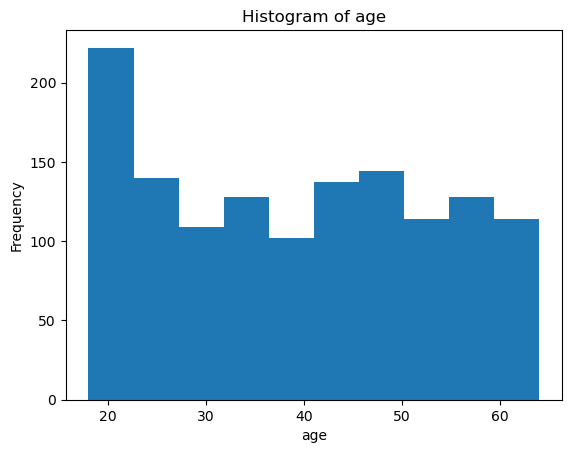

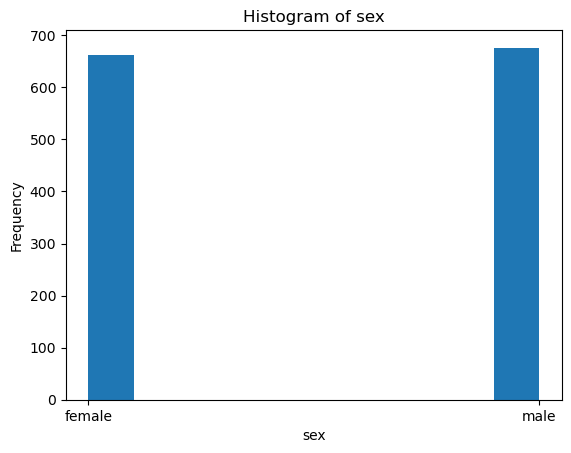

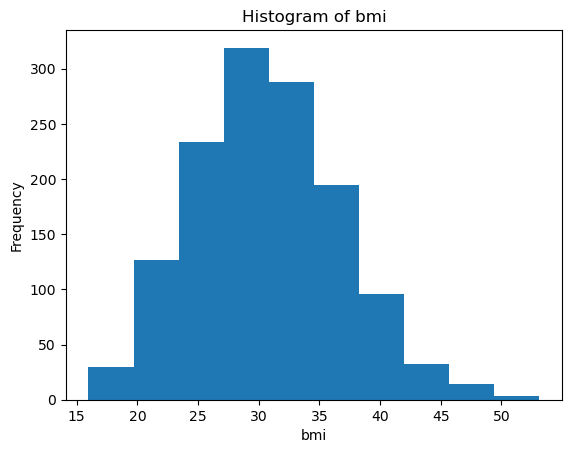

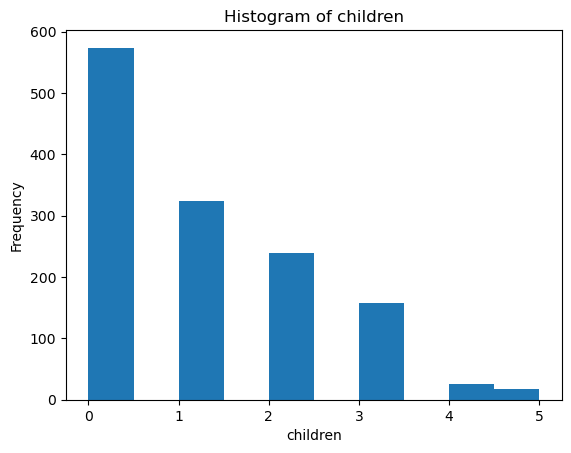

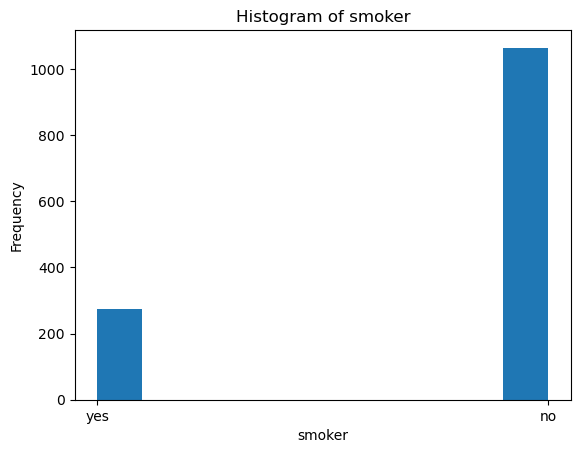

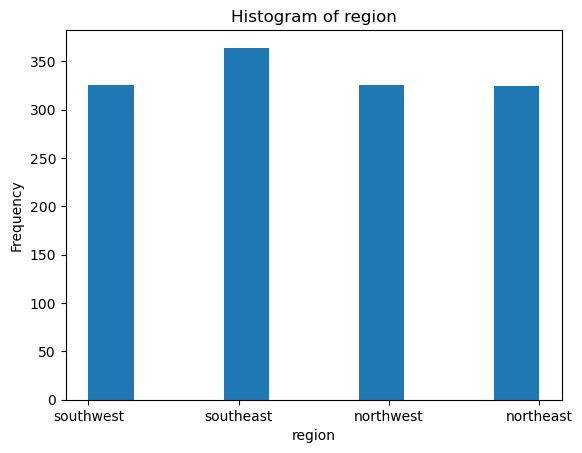

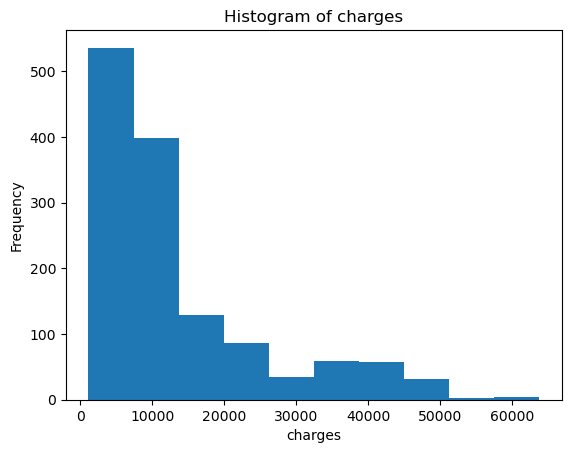

In [29]:
for column in data.columns:
    # Plot histogram
    plt.hist(data[column])
    
    
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title("Histogram of " + column)
    
    # The histograms below showcase the variables from the dataset, age, sex, bmi, children, smoker, region and charges. 
    # I don't believe there are any outliers, as each variable
    plt.show()

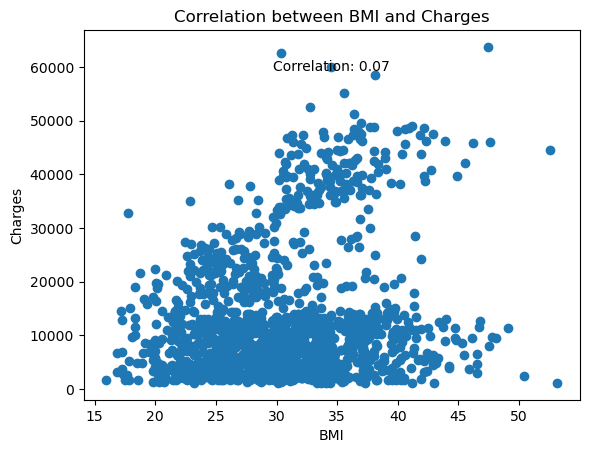

In [36]:

bmi_charges_data = data[['bmi', 'charges']]


bmi_charges_data = bmi_charges_data.dropna()


plt.scatter(bmi_charges_data['bmi'], bmi_charges_data['charges'])


plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Correlation between BMI and Charges')

plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)


plt.show()

# I chose to create a scatter plot that showed the correlation between BMI and Charges.
# People with a BMI between 30-50 on average paid higher charges than though who had a BMIs of 30 or less. 

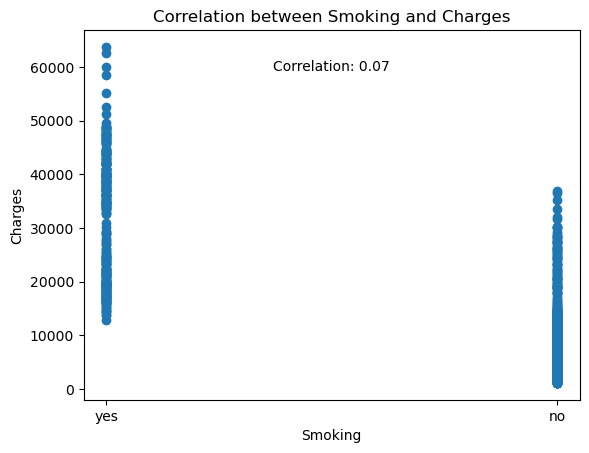

In [35]:
smoking_charges_data = data[['smoker', 'charges']]


smoking_charges_data = smoking_charges_data.dropna()


plt.scatter(smoking_charges_data['smoker'], smoking_charges_data['charges'])


plt.xlabel('Smoking')
plt.ylabel('Charges')
plt.title('Correlation between Smoking and Charges')

plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

# Again we see another correlation, on average people who smoked were charged higher than those who did not.
# Due to the binary nature of the responses, this is much easier to discern.

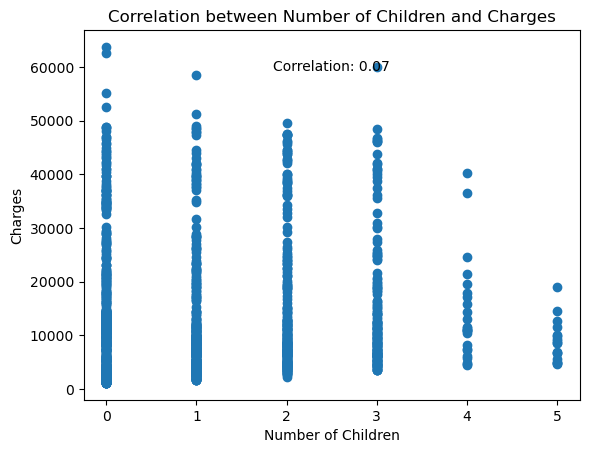

In [34]:
children_charges_data = data[['children', 'charges']]


children_charges_data = children_charges_data.dropna()


correlation = children_charges_data['children'].corr(children_charges_data['charges'])


plt.scatter(children_charges_data['children'], children_charges_data['charges'])


plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Correlation between Number of Children and Charges')


plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)


plt.show()

# This chart was intersting as it showed something I was not expecting, people with more children actually paid less than people with more. 

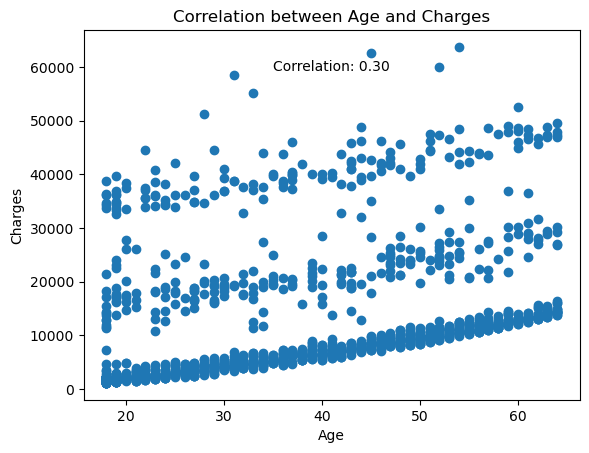

In [37]:
age_charges_data = data[['age', 'charges']]

age_charges_data = age_charges_data.dropna()


correlation = age_charges_data['age'].corr(age_charges_data['charges'])


plt.scatter(age_charges_data['age'], age_charges_data['charges'])


plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Correlation between Age and Charges')


plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)


plt.show()

# Age seems to be the biggest correlation with charges, with it slowing upwards and to the right. 

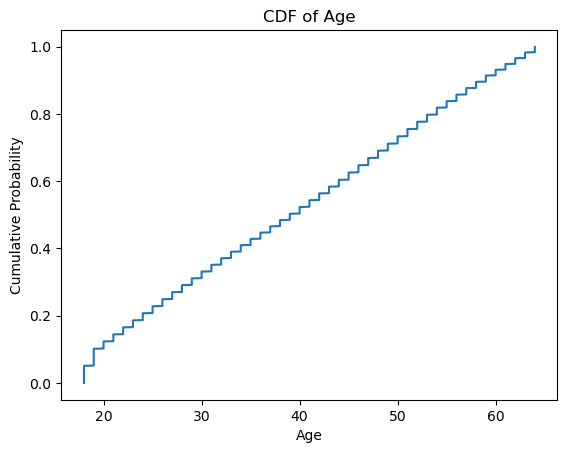

In [38]:
age_data = data['age']

# Remove any missing values
age_data = age_data.dropna()

# Calculate the cumulative probability
sorted_age = np.sort(age_data)
cumulative_prob = np.arange(len(sorted_age)) / float(len(sorted_age))

# Create the CDF plot
plt.plot(sorted_age, cumulative_prob)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Age')

# Show the plot
plt.show()

In [40]:

# Calculate statistics for 'age'
age_mean = np.mean(data['age'])
age_mode = data['age'].mode().values[0]
age_std = np.std(data['age'])
age_min = np.min(data['age'])
age_max = np.max(data['age'])

# Print the calculated statistics
print("Statistics for 'age':")
print("Mean:", age_mean)
print("Mode:", age_mode)
print("Standard Deviation:", age_std)
print("Minimum:", age_min)
print("Maximum:", age_max)
print()

Statistics for 'age':
Mean: 39.20702541106129
Mode: 18
Standard Deviation: 14.04470903895454
Minimum: 18
Maximum: 64



In [41]:
# Calculate statistics for 'bmi'
bmi_mean = np.mean(data['bmi'])
bmi_mode = data['bmi'].mode().values[0]
bmi_std = np.std(data['bmi'])
bmi_min = np.min(data['bmi'])
bmi_max = np.max(data['bmi'])

print("Statistics for 'bmi':")
print("Mean:", bmi_mean)
print("Mode:", bmi_mode)
print("Standard Deviation:", bmi_std)
print("Minimum:", bmi_min)
print("Maximum:", bmi_max)
print()


Statistics for 'bmi':
Mean: 30.663396860986538
Mode: 32.3
Standard Deviation: 6.095907641589428
Minimum: 15.96
Maximum: 53.13



In [42]:
# Calculate statistics for 'smoker'
smoker_mode = data['smoker'].mode().values[0]

print("Statistics for 'smoker':")
print("Mode:", smoker_mode)
print()

Statistics for 'smoker':
Mode: no



In [43]:
# Calculate statistics for 'children'
children_mean = np.mean(data['children'])
children_mode = data['children'].mode().values[0]
children_std = np.std(data['children'])
children_min = np.min(data['children'])
children_max = np.max(data['children'])

print("Statistics for 'children':")
print("Mean:", children_mean)
print("Mode:", children_mode)
print("Standard Deviation:", children_std)
print("Minimum:", children_min)
print("Maximum:", children_max)
print()


Statistics for 'children':
Mean: 1.0949177877429
Mode: 0
Standard Deviation: 1.2050421724928453
Minimum: 0
Maximum: 5



In [44]:
# Calculate statistics for 'sex'
sex_mode = data['sex'].mode().values[0]


print("Statistics for 'sex':")
print("Mode:", sex_mode)

Statistics for 'sex':
Mode: male


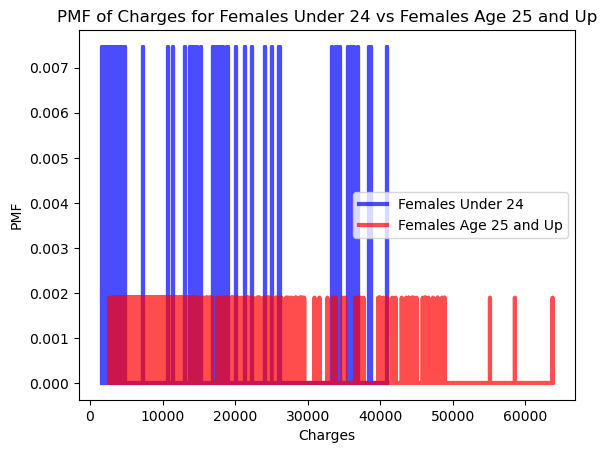

<Figure size 800x600 with 0 Axes>

In [51]:

female_under_24 = data[(data['sex'] == 'female') & (data['age'] <= 24)]


female_25_up = data[(data['sex'] == 'female') & (data['age'] >= 25)]


pmf_female_under_24 = thinkstats2.Pmf(female_under_24['charges'])
pmf_female_25_up = thinkstats2.Pmf(female_25_up['charges'])


thinkplot.Pmf(pmf_female_under_24, color='blue', label='Females Under 24')
thinkplot.Pmf(pmf_female_25_up, color='red', label='Females Age 25 and Up')
thinkplot.Show(xlabel='Charges', ylabel='PMF', title='PMF of Charges for Females Under 24 vs Females Age 25 and Up')

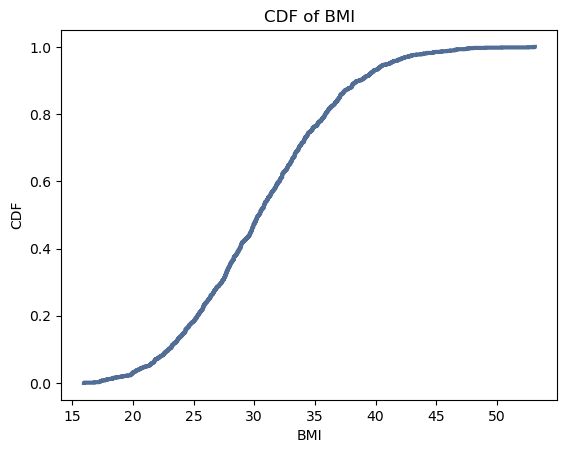

<Figure size 800x600 with 0 Axes>

In [52]:


cdf = thinkstats2.Cdf(data['bmi'])


thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='BMI', ylabel='CDF', title='CDF of BMI')

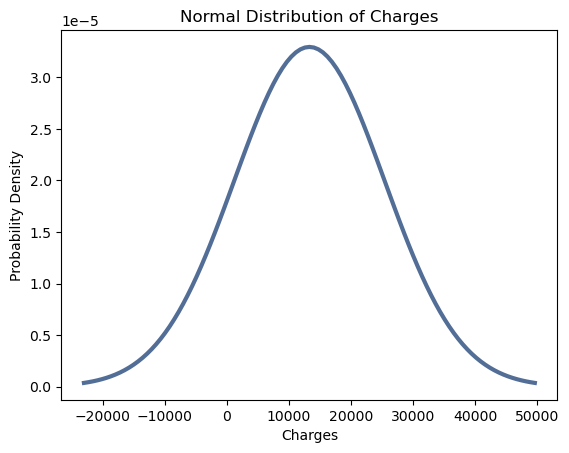

<Figure size 800x600 with 0 Axes>

In [53]:
# Fit a distribution to the 'charges' variable
dist = thinkstats2.NormalPdf(data['charges'].mean(), data['charges'].std())

# Plot the distribution
thinkplot.Pdf(dist)

# Scatter plot of 'age' vs 'charges'
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age vs Charges')
plt.show()thinkplot.Show(xlabel='Charges', ylabel='Probability Density', title='Normal Distribution of Charges')

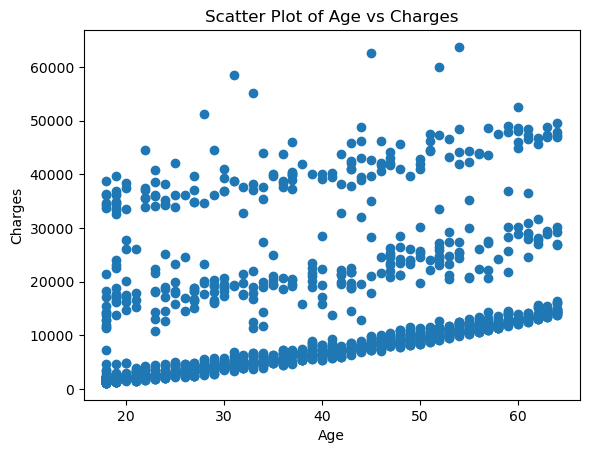

Pearson's correlation coefficient:  0.29900819333064754


In [56]:
# Scatter plot of 'age' vs 'charges'
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age vs Charges')
plt.show()

correlation = data['age'].corr(data['charges'])
print("Pearson's correlation coefficient: ", correlation)

In [68]:
class AgeHypothesisTest(HypothesisTest):
    def test_statistic(self, data):
        under_30_charges = data[data['age'] < 30]['charges']
        above_30_charges = data[data['age'] >= 30]['charges']
        test_stat = np.abs(under_30_charges.mean() - above_30_charges.mean())
        return test_stat

    def run_model(self):
        shuffled = self.data.copy()
        shuffled['age'] = np.random.permutation(shuffled['age'])
        return shuffled

In [69]:
age_test = AgeHypothesisTest(data)
p_value = age_test.p_value()
print("p-value:", p_value)

p-value: 0.0


In [72]:
X = data[['age', 'bmi']]
y = data['charges']


X = sm.add_constant(X)


model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           7.39e-37
Time:                        12:05:45   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.0